In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-06-10 09:30:12--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-06-10 09:30:12--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-06-10 09:30:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)


In [3]:
from sklearn.decomposition import PCA

pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n= len(arr) # n은 샘플 개수
  rows= int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols,
                    figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()


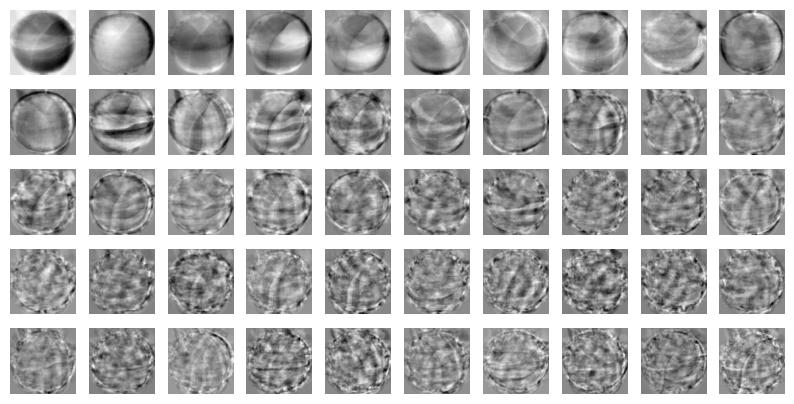

In [6]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca= pca.transform(fruits_2d)

In [9]:
print(fruits_pca.shape)

(300, 50)


#원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

#설명된 분산


In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215495065800815


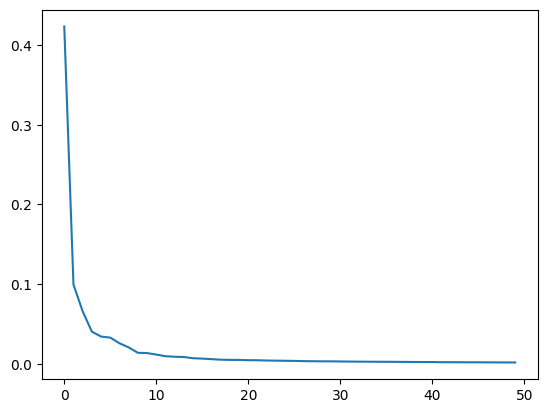

In [15]:
plt.plot(pca.explained_variance_ratio_)

In [21]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

In [22]:
target = np.array([0]*100+[1]*100+[2]*100)

In [23]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5679420471191405


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.024633502960205077


In [27]:
pca =PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [30]:
print(pca.n_components_)

2


In [32]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [34]:
scores= cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.07282509803771972


In [51]:
from sklearn.cluster import KMeans

km= KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [52]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


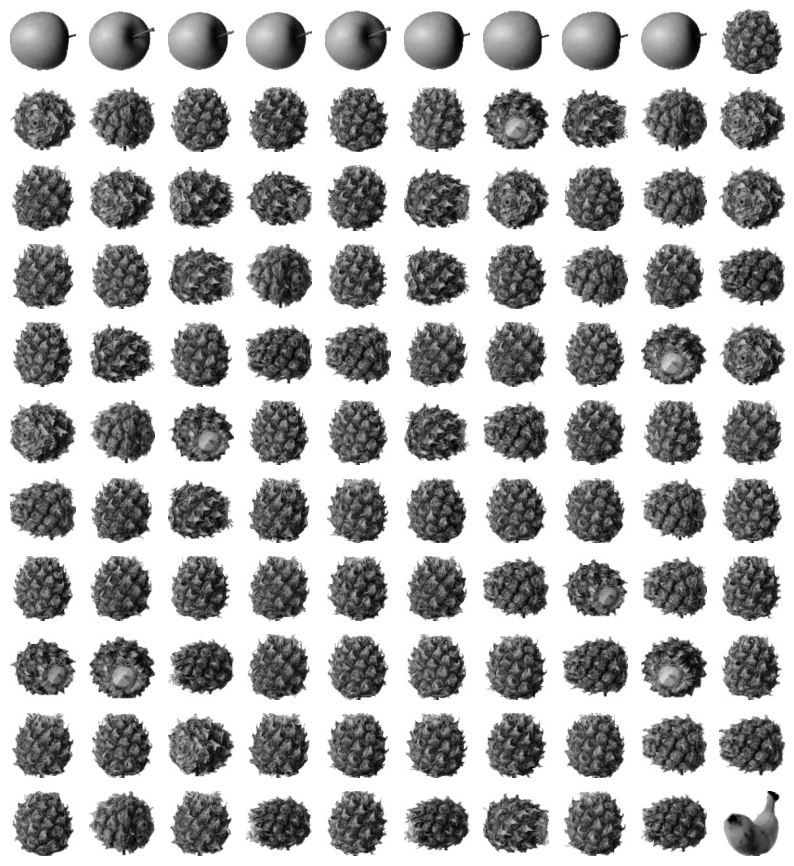

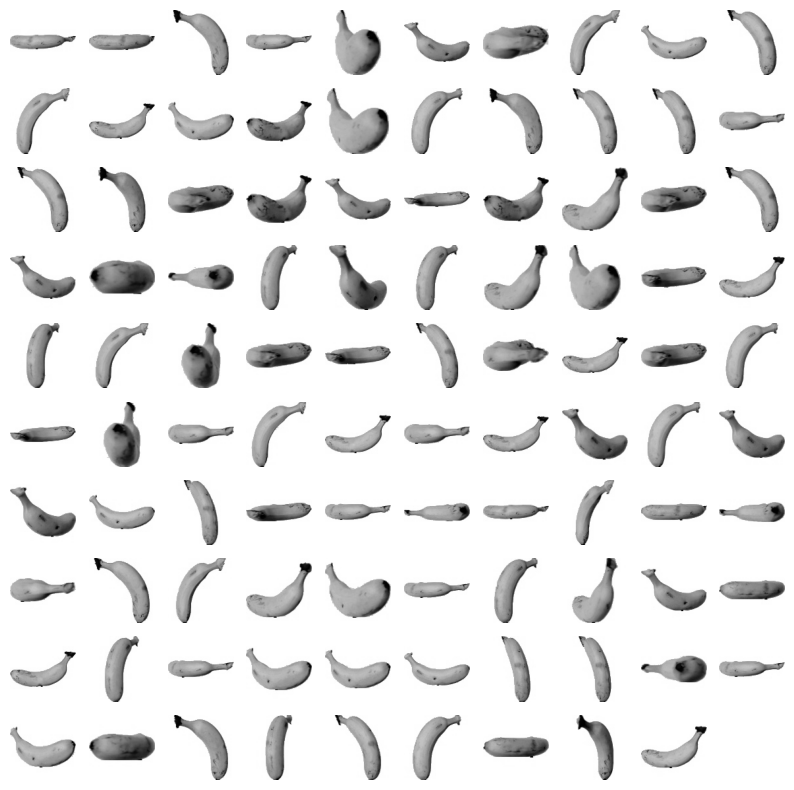

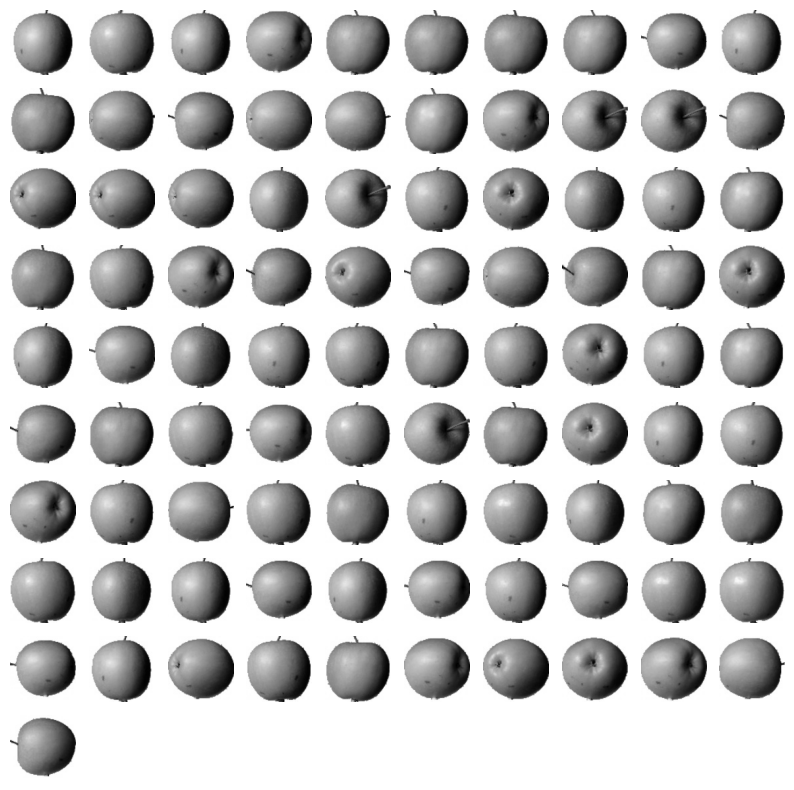

In [53]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

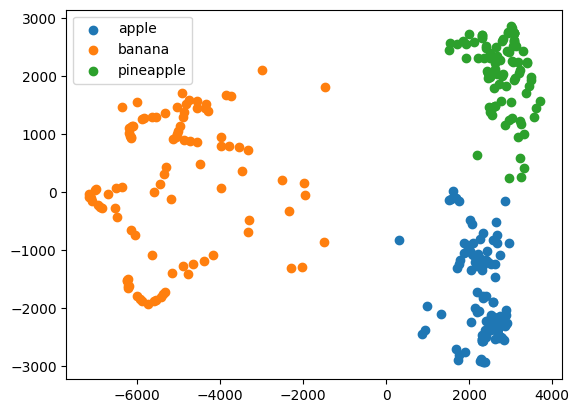

In [56]:
for label in range(0, 3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()